# Project Scoping

## 1. Project Goals

Some initial questions to answer that could be explored:

- What is the overall biodiversity across the parks?
- Are certain species more concentrated in specific parks?
- Are certain categories more endangered than others?
- Which parks have the most endangered species?
- Which species are most under threat?

## 2. Understanding the Dataset

There are two csv files: `species_info.csv` and `observations.csv`.
- `species_info.csv` columns: Animal category (eg. mammal), scientific name, common name, and conservation status.
- `observations.csv` columns: scientific name, park name, and number of observations of that animal over previous 7 days.

**Data Types**: all columns are string objects except for the number of observations which are int64.

**Size & Quality**:

- `species_info.csv`: 5,824 rows x 4 columns. Missing values: 5,633 (97%), all in the conservation status column.
- `observations.csv`: 23,296 rows x 3 columns. Missing values: 0

## 3. Key Metrics/Analysis Techniques

- Biodiversity Indexes to consider: Simpson’s Diversity Index, or Shannon Index to quantify biodiversity.
- Trend Analysis: Identify trends between parks.
- Visualization: Plan on using visualizations like bar charts, heatmaps, or maps to make the data easier to interpret.

## 4. Tools & Methods

Python Libraries: pandas, matplotlib, seaborn, for analysis and visualizations. Plotly for interactive map visualizations.

## 5. Deliverables

- Jupyter Notebook Report: Clear insights into biodiversity trends, backed by data.
- Linkedin Article: A summary of the findings and the importance of biodiversity conservation.
- Visualizations: Maps showing species distribution, charts for biodiversity indexes, etc.
- Conclusion: Summarize key findings.

---

# Boilerplate Structure for the Jupyter Notebook Report:

Brief overview of the project.
Define the project goals (e.g., understanding biodiversity distribution, identifying trends, etc.).
Dataset Overview

Description of the dataset (source, size, variables).
Initial observations (any patterns or peculiarities?).
Data Cleaning & Preprocessing

Missing data handling, outliers, data transformation.
Tools and libraries used (e.g., pandas, NumPy).
Exploratory Data Analysis (EDA)

Visualizations of species diversity, park distributions, etc.
Any summary statistics or interesting patterns.
Species trends over time (if applicable).
Key Metrics & Calculations

Biodiversity indexes (e.g., Shannon Index, species richness).
Breakdown by park, species group, or region.
Insights & Findings

Highlight major trends or patterns found during analysis.
Discuss regional biodiversity differences, species at risk, etc.
Conservation Implications

Based on your findings, discuss potential conservation actions.
Any policy recommendations?
Conclusion

Summarize key takeaways.
Future work (e.g., further data collection, predictive modeling).
Appendix

Code snippets, additional graphs, or tables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
# Load the data for each table
df_obs = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

# Display the first few rows of each table, sorted by 'scientic_name' column
df_obs = df_obs.sort_values(by='scientific_name')
df_species = df_species.sort_values(by='scientific_name')
pd.set_option('display.width', 1000) # Set a large width to prevent wrapping
print('Observations:')
print(df_obs.head(10))
print('-' * 100)
print('Species Info:')
print(df_species.head(10))

Observations:
      scientific_name                            park_name  observations
8050    Abies bifolia            Yellowstone National Park           215
4968    Abies bifolia                  Bryce National Park           109
17990   Abies bifolia  Great Smoky Mountains National Park            72
20930   Abies bifolia               Yosemite National Park           136
4647   Abies concolor  Great Smoky Mountains National Park           101
15193  Abies concolor            Yellowstone National Park           241
23166  Abies concolor               Yosemite National Park           205
8170   Abies concolor                  Bryce National Park            83
2014    Abies fraseri                  Bryce National Park           109
11141   Abies fraseri            Yellowstone National Park           218
----------------------------------------------------------------------------------------------------
Species Info:
               category       scientific_name                       

To ease data analysis and visualization, the two datasets are consolidated into one.

The common column is `scientific_name` in both datasets. It appears as though there might be four rows per species, one for each park, but this is checked as follows:

In [4]:
# Check the number of species (`scientific_name`) per park
species_per_park = df_obs.groupby('park_name')['scientific_name'].nunique()
print('Number of species per park:')
print(species_per_park)

Number of species per park:
park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64


## Cleaning the `df_obs` DataFrame

First, we drop duplicate rows:

In [11]:
# identify duplicate rows in the observations table
duplicates = df_obs.duplicated()
print('Number of duplicate rows in the observations table:')
print(duplicates.sum())

# count number of duplicate rows in the observations table
duplicates = df_obs.duplicated()

# remove duplicate rows from the observations table and save as a new dataframe
df_obs_no_duplicates = df_obs.drop_duplicates()

duplicates_check = df_obs_no_duplicates.duplicated()

print('Number of duplicate rows in the observations table after removing duplicates:')
print(duplicates_check.sum())

# count number of rows of df_obs_no_duplicates
print('Number of rows in the observations table after removing duplicates:')
print(df_obs_no_duplicates.shape[0])

Number of duplicate rows in the observations table:
15
Number of duplicate rows in the observations table after removing duplicates:
0
Number of rows in the observations table after removing duplicates:
23281


In [12]:
print(f'''If there are 5541 distinct species per park, and 4 parks, there should be 5541 * 4 = 22164 rows in the `observations.csv` file.
      
However, there are actually {df_obs_no_duplicates.shape[0]} rows i.e. an additional {df_obs_no_duplicates.shape[0] - 22164} rows.

This suggests that there are some species with more than one row for the same park. This is checked as follows:''')

If there are 5541 distinct species per park, and 4 parks, there should be 5541 * 4 = 22164 rows in the `observations.csv` file.
      
However, there are actually 23281 rows i.e. an additional 1117 rows.

This suggests that there are some species with more than one row for the same park. This is checked as follows:


In [13]:

# Group by scientific_name and count the total number of rows for each
species_row_count = df_obs_no_duplicates.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 4 rows
species_row_count = species_row_count[species_row_count['count'] > 4]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 4 rows:')
print(species_row_count['scientific_name'].nunique())

df_obs_multiples = df_obs_no_duplicates.groupby(['scientific_name']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()
df_obs_multiples = df_obs_multiples.sort_values(['scientific_name_count'])
df_obs_multiples = df_obs_multiples[df_obs_multiples['scientific_name_count'] > 4]

# for each value of scientific_name_count, list the scientific_name
for scientific_name_count in df_obs_multiples['scientific_name_count'].unique():
    print(f'Species with {scientific_name_count} rows:')
    scientific_names = df_obs_multiples[df_obs_multiples['scientific_name_count'] == scientific_name_count]['scientific_name'].tolist()
    scientific_names_sorted = sorted(scientific_names)  # Sort the list alphabetically
    print(scientific_names_sorted)

Number of species with more than 4 rows:
274
Species with 7 rows:
['Arctium minus', 'Botrychium virginianum', 'Cichorium intybus', 'Echinochloa crus-galli', 'Eleocharis palustris', 'Hesperis matronalis', 'Monotropa hypopithys', 'Plantago major', 'Poa compressa', 'Potentilla norvegica', 'Prunella vulgaris', 'Salix exigua', 'Spilogale putorius', 'Trifolium campestre']
Species with 8 rows:
['Agrostis capillaris', 'Agrostis gigantea', 'Agrostis mertensii', 'Agrostis scabra', 'Agrostis stolonifera', 'Agrostis variabilis', 'Alectoris chukar', 'Amaranthus albus', 'Amaranthus retroflexus', 'Ambrosia artemisiifolia', 'Anagallis arvensis', 'Anthemis cotula', 'Anthus rubescens', 'Apocynum androsaemifolium', 'Apocynum cannabinum', 'Arabidopsis thaliana', 'Arenaria serpyllifolia', 'Asparagus officinalis', 'Avena sativa', 'Barbarea vulgaris', 'Bidens cernua', 'Bidens tripartita', 'Botrychium simplex', 'Branta bernicla', 'Brassica rapa', 'Bromus japonicus', 'Bromus secalinus', 'Bromus tectorum', 'Bul

In [14]:
# Sum values in the 'observations' column, displayed with commas
total_obs = df_obs_no_duplicates['observations'].sum()
total_obs_str = '{:,}'.format(total_obs)
print(f'Total number of observations: {total_obs_str}')

Total number of observations: 3,312,429


In [15]:
# Sum observations values for duplicates where scientific name and park name are the same.
df_obs_clean = df_obs_no_duplicates.groupby(['scientific_name', 'park_name']).sum().reset_index()
df_obs_clean.to_csv('observations_clean.csv', index=False)

# Sum values in the 'observations' column, displayed with commas
total_obs_clean = df_obs_clean['observations'].sum()
total_obs_clean_str = '{:,}'.format(total_obs_clean)
print(f'Total number of observations after removing duplicates: {total_obs_clean_str}')

Total number of observations after removing duplicates: 3,312,429


Now that we have removed the duplicates and aggregated the observations for species within each park, we can check that there are four rows per species per park:

In [16]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df_obs_clean.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 4 rows
species_row_count = species_row_count[species_row_count['count'] > 4]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 4 rows:')
print(species_row_count['scientific_name'].nunique())

Number of species with more than 4 rows:
0


## Cleaning the `df_species` DataFrame

Before we merge the tables, `df_species` is checked for duplicates:

In [17]:
duplicates = df_species.duplicated()
print('Number of duplicate rows in the species table:')
print(duplicates.sum())

Number of duplicate rows in the species table:
0


In [18]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df_species.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 1 row
species_row_count = species_row_count[species_row_count['count'] > 1]
# Count the number of unique species with more than 1 rows
print('Number of species with more than 1 row:')
print(species_row_count['scientific_name'].nunique())

Number of species with more than 1 row:
274


In [20]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df_species.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 1 row
species_row_count = species_row_count[species_row_count['count'] > 1]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 1 row:')
print(species_row_count['scientific_name'].nunique())

df_species_multiples = df_species.groupby(['scientific_name']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()
df_species_multiples = df_species_multiples.sort_values(['scientific_name_count'])
df_species_multiples = df_species_multiples[df_species_multiples['scientific_name_count'] > 1]

# for each value of scientific_name_count, list the scientific_name
for scientific_name_count in df_species_multiples['scientific_name_count'].unique():
    print(f'Species with {scientific_name_count} rows:')
    scientific_names = df_species_multiples[df_species_multiples['scientific_name_count'] == scientific_name_count]['scientific_name'].tolist()
    scientific_names_sorted = sorted(scientific_names)  # Sort the list alphabetically
    print(scientific_names_sorted)

Number of species with more than 1 row:
274
Species with 2 rows:
['Agrostis capillaris', 'Agrostis gigantea', 'Agrostis mertensii', 'Agrostis scabra', 'Agrostis stolonifera', 'Agrostis variabilis', 'Alectoris chukar', 'Amaranthus albus', 'Amaranthus retroflexus', 'Ambrosia artemisiifolia', 'Anagallis arvensis', 'Anthemis cotula', 'Anthus rubescens', 'Apocynum androsaemifolium', 'Apocynum cannabinum', 'Arabidopsis thaliana', 'Arctium minus', 'Arenaria serpyllifolia', 'Asparagus officinalis', 'Avena sativa', 'Barbarea vulgaris', 'Bidens cernua', 'Bidens tripartita', 'Botrychium simplex', 'Botrychium virginianum', 'Branta bernicla', 'Brassica rapa', 'Bromus japonicus', 'Bromus secalinus', 'Bromus tectorum', 'Bulbostylis capillaris', 'Butorides virescens', 'Calamagrostis canadensis', 'Callitriche heterophylla', 'Cannabis sativa', 'Capsella bursa-pastoris', 'Cardamine pensylvanica', 'Carduus acanthoides', 'Carex leptalea', 'Carum carvi', 'Centaurea cyanus', 'Centrocercus urophasianus', 'Cer

In [24]:
# Group by scientific_name and count the occurrences
species_count = df_species.groupby('scientific_name').size().reset_index(name='count')

# Filter to keep only those scientific_name with a count greater than 1
species_with_duplicates = species_count[species_count['count'] > 1]

# Merge with the original DataFrame to get the full rows
df_multiples = pd.merge(df_species, species_with_duplicates[['scientific_name']], on='scientific_name', how='inner')

# Display the rows with duplicate scientific_name
print(df_multiples)



           category      scientific_name                                       common_names conservation_status
0    Vascular Plant  Agrostis capillaris                  Colonial Bent, Colonial Bentgrass                 NaN
1    Vascular Plant  Agrostis capillaris                                  Rhode Island Bent                 NaN
2    Vascular Plant    Agrostis gigantea                Black Bent, Redtop, Water Bentgrass                 NaN
3    Vascular Plant    Agrostis gigantea                                             Redtop                 NaN
4    Vascular Plant   Agrostis mertensii                                  Northern Agrostis                 NaN
..              ...                  ...                                                ...                 ...
552  Vascular Plant        Vulpia myuros                                     Rattail Fescue                 NaN
553  Vascular Plant     Vulpia octoflora  Eight-Flower Six-Weeks Grass, Pullout Grass, S...             

Reviewing this table shows that there are two types of duplicates:
- The first type is where the `scientific_name` is the same, but the `common_names` are different. It would be useful to keep these alternative names, so the best solution is to concatenate them into a single string to correlate with a single row for each `scientific_name`.
- The second type is where the `scientific_name` is the same, but the `conservation_status` is different. The only instance of this is for the species 'Oncorhynchus mykiss' (Rainbow Trout), which has two rows, one with a status of 'Threated' and the other with 'Missing value'. Since there is only one instance of this, it is safe to drop the row with the missing value.

In [31]:
# Drop the row for 'Oncorhynchus mykiss' and 'Missing value'
df_species_clean = df_species[(df_species['scientific_name'] != 'Oncorhynchus mykiss') & (df_species['scientific_name'] != 'Missing')]

# Group by scientific_name and concatenate the common_names into a single string, keeping conservation_status column
df_species_clean = df_species_clean.groupby('scientific_name').agg(
    common_names=('common_names', lambda x: ', '.join(x)),
    conservation_status=('conservation_status', 'first')
).reset_index()

# Save the cleaned species_info table to a new CSV file
df_species_clean.to_csv('species_info_clean.csv', index=False)

In [32]:
# Print the rows for 'Agrostis capillaris'
print(df_species_clean[df_species_clean['scientific_name'] == 'Agrostis capillaris'])

         scientific_name                                       common_names conservation_status
104  Agrostis capillaris  Colonial Bent, Colonial Bentgrass, Rhode Islan...                None


In [34]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df_species_clean.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 1 row
species_row_count = species_row_count[species_row_count['count'] > 1]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 1 row:')
print(species_row_count['scientific_name'].nunique())

df_species_multiples = df_species_clean.groupby(['scientific_name']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()
df_species_multiples = df_species_multiples.sort_values(['scientific_name_count'])
df_species_multiples = df_species_multiples[df_species_multiples['scientific_name_count'] > 1]

# for each value of scientific_name_count, list the scientific_name
for scientific_name_count in df_species_multiples['scientific_name_count'].unique():
    print(f'Species with {scientific_name_count} rows:')
    scientific_names = df_species_multiples[df_species_multiples['scientific_name_count'] == scientific_name_count]['scientific_name'].tolist()
    scientific_names_sorted = sorted(scientific_names)  # Sort the list alphabetically
    print(scientific_names_sorted)



Number of species with more than 1 row:
0


Both tables are now cleaned and ready to be merged.

# Merging the DataFrames

In [35]:
# Merge the two tables on the 'scientific_name' column
df = pd.merge(df_obs_clean, df_species_clean, on='scientific_name')

# Sort the merged table by 'scientific_name' then 'park_name', and save as a new CSV file
df = df.sort_values(by=['scientific_name', 'park_name'])
df.to_csv('observations_species.csv', index=False)

# Display the first few rows of the merged table
pd.set_option('display.width', 1000) # Set a large width to prevent wrapping
print(df.head(15))

         scientific_name                            park_name  observations                                       common_names conservation_status
0          Abies bifolia                  Bryce National Park           109                          Rocky Mountain Alpine Fir                None
1          Abies bifolia  Great Smoky Mountains National Park            72                          Rocky Mountain Alpine Fir                None
2          Abies bifolia            Yellowstone National Park           215                          Rocky Mountain Alpine Fir                None
3          Abies bifolia               Yosemite National Park           136                          Rocky Mountain Alpine Fir                None
4         Abies concolor                  Bryce National Park            83  Balsam Fir, Colorado Fir, Concolor Fir, Silver...                None
5         Abies concolor  Great Smoky Mountains National Park           101  Balsam Fir, Colorado Fir, Concolor Fir, S

In [105]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 4 rows
species_row_count = species_row_count[species_row_count['count'] > 4]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 4 rows:')
print(species_row_count['scientific_name'].nunique())

Number of species with more than 4 rows:
274


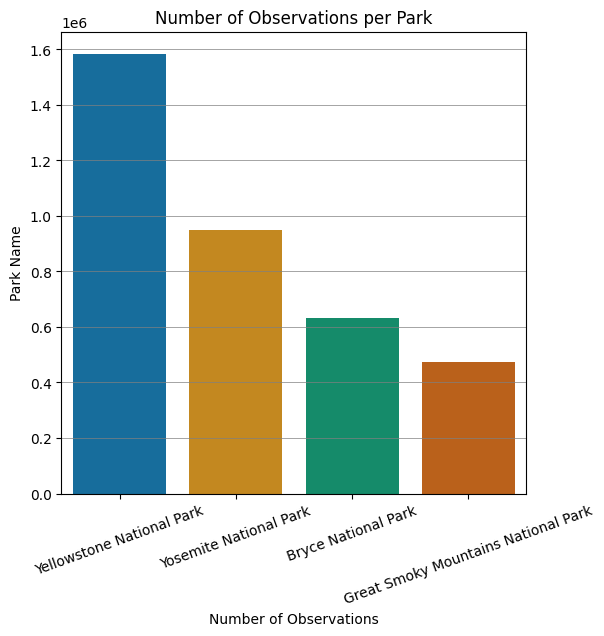

In [91]:
# Plot a bar chart of the number of observations per park, descending order
df_park_obs = df.groupby('park_name')['observations'].sum().reset_index()
df_park_obs = df_park_obs.sort_values(by='observations', ascending=False)
plt.figure(figsize=(6, 6))
sns.barplot(data=df_park_obs, x='park_name', y='observations', hue='park_name', palette='colorblind', legend=False)
plt.xlabel('Number of Observations')
plt.xticks(rotation=20)
plt.ylabel('Park Name')
plt.title('Number of Observations per Park')
plt.grid(axis='y', which='major', color='grey', linestyle='-', linewidth=0.5)
plt.show()


The above graph shows that the number of observations made per park, in descending order are Yosemite, Yellowstone, Bryce, then Great Smoky Mountains.

This is interesting in that Great Smoky Mountains is around 15x larger than Bryce Canyon, yet has fewer observations. This could be due to a number of factors, such as:
- The number of researchers
- The number of species in the park
- The number of species that are easily observable
- The number of species that are of interest to researchers

Therefore, no conclusions can be drawn from this graph alone.

NB. The size of these four parks are as follows:
- Yellowstone National Park – about 2.2 million acres (the largest U.S. national park in the contiguous U.S.).
- Yosemite National Park – around 748,000 acres.
- Great Smoky Mountains National Park – approximately 522,000 acres.
- Bryce Canyon National Park – about 35,800 acres (much smaller compared to the others).

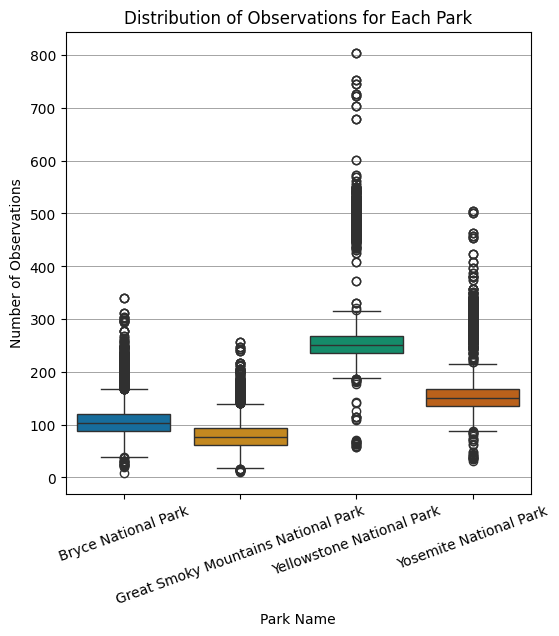

In [65]:
# Boxplots of observations for each park
plt.figure(figsize=(6, 6))

sns.boxplot(data=df, x='park_name', y='observations', hue='park_name', palette='colorblind', legend=False)
plt.title('Distribution of Observations for Each Park')
plt.xticks(rotation=20)
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.grid(axis='y', which='major', color='grey', linestyle='-', linewidth=0.5)
plt.show()

This graph shows that there were a significant number of observations made which can be considered outliers. These are likely to be species that are either very common or very rare. Visually, there appear to fewer 'rare' sightings in Great Smoky Mountains, but this is not conclusive.

## Conservation Status Categories

- Endangered: This is the most severe category, meaning a species is at a very high risk of extinction in the near future.
- Threatened: These species are not as immediately at risk as endangered species but are likely to become endangered soon if no action is taken.
- Species of Concern: While not yet listed as threatened or endangered, these species are being monitored due to declining populations or other risks.
- Other: This category would include species not currently considered at risk but might include those under watch for other reasons (e.g., habitat loss or lesser-known threats).

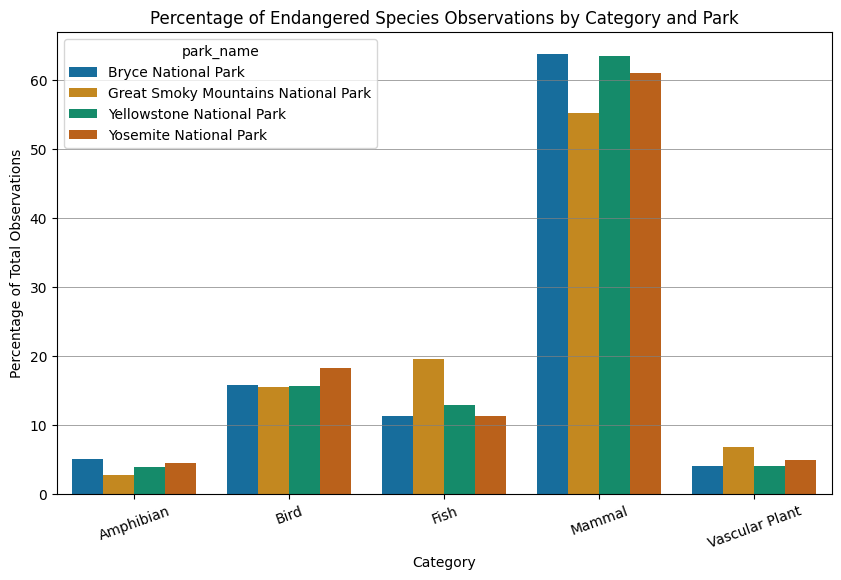

In [98]:
# Filtering by 'Endangered' conservation status, barplot for each category and park as a percentage of the total number of observations
df_endangered = df[df['conservation_status'] == 'Endangered']
df_endangered = df_endangered.groupby(['park_name', 'category'])['observations'].sum().reset_index()
df_endangered['total_observations'] = df_endangered.groupby('park_name')['observations'].transform('sum')
df_endangered['percentage'] = df_endangered['observations'] / df_endangered['total_observations'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=df_endangered, x='category', y='percentage', hue='park_name', palette='colorblind')
plt.title('Percentage of Endangered Species Observations by Category and Park')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Observations')
plt.xticks(rotation=20)
plt.grid(axis='y', which='major', color='grey', linestyle='-', linewidth=0.5)
plt.show()

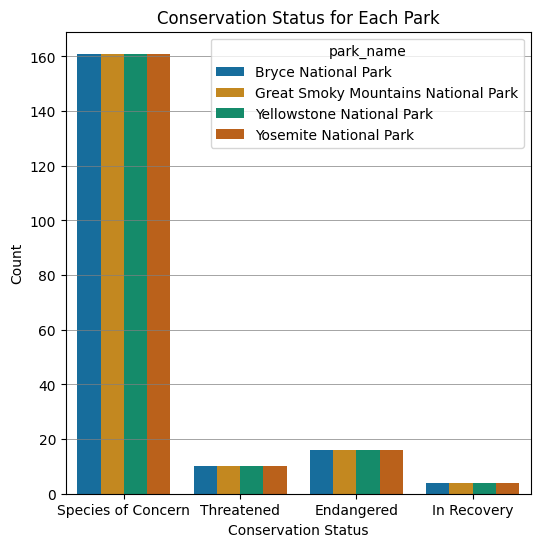

In [99]:
# Count plot of conservation status for each park
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='conservation_status', hue='park_name', palette='colorblind')
plt.title('Conservation Status for Each Park')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.grid(axis='y', which='major', color='grey', linestyle='-', linewidth=0.5)
plt.show()

NB. the default merge in pandas is an inner merge, meaning only rows 

In [100]:
from skbio.diversity.alpha import shannon, simpson

# Function to calculate biodiversity indices for a park
def calculate_biodiversity(park_group):
    species_counts = park_group['observations'].values
    # park_name = park_group['park_name'].iloc[0]
    
    # Calculate Shannon and Simpson indices
    shannon_index = shannon(species_counts)
    simpson_index = simpson(species_counts)
    
    return pd.Series({
        'Shannon Index': shannon_index,
        'Simpson Index': simpson_index,
        'Reciprocal Simpson Index': 1 / simpson_index
    })

# Group by park_name and calculate biodiversity indices
biodiversity_by_park = df.groupby('park_name').apply(calculate_biodiversity)

# Display the results
biodiversity_by_park


/var/folders/31/b83g6pvj6517llc9rc703ygm0000gn/T/ipykernel_76817/1345551667.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity_by_park = df.groupby('park_name').apply(calculate_biodiversity)


,Shannon Index,Simpson Index,Reciprocal Simpson Index
park_name,,,
Bryce National Park,8.617229,0.999808,1.000192
Great Smoky Mountains National Park,8.602168,0.999803,1.000197
Yellowstone National Park,8.633687,0.999813,1.000187
Yosemite National Park,8.627902,0.999811,1.000189


In [101]:
# Function to calculate biodiversity indices using numpy
def calculate_biodiversity_numpy(park_group):
    species_counts = park_group['observations'].values
    total_observations = np.sum(species_counts)

    # Calculate proportions
    proportions = species_counts / total_observations

    # Calculate Shannon Index
    shannon_index = -np.sum(proportions * np.log(proportions + 1e-10))  # Adding a small constant to avoid log(0)

    # Calculate Simpson's Index
    simpson_index = 1 - np.sum(proportions**2)

    # Calculate Reciprocal Simpson's Index
    reciprocal_simpson_index = 1 / simpson_index if simpson_index != 0 else 0

    return pd.Series({
        'Shannon Index': shannon_index,
        'Simpson Index': simpson_index,
        'Reciprocal Simpson Index': reciprocal_simpson_index
    })

# Group by park_name and calculate biodiversity indices
biodiversity_by_park_numpy = df.groupby('park_name').apply(calculate_biodiversity_numpy)

# Display the results
biodiversity_by_park_numpy

/var/folders/31/b83g6pvj6517llc9rc703ygm0000gn/T/ipykernel_76817/310744387.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity_by_park_numpy = df.groupby('park_name').apply(calculate_biodiversity_numpy)


,Shannon Index,Simpson Index,Reciprocal Simpson Index
park_name,,,
Bryce National Park,8.617228,0.999808,1.000192
Great Smoky Mountains National Park,8.602168,0.999803,1.000197
Yellowstone National Park,8.633687,0.999813,1.000187
Yosemite National Park,8.627901,0.999811,1.000189


In [26]:
# check for missing values
print(df.isnull().sum())

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64


In [27]:
# print unique values of conservation_status
print(df.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
